In [1]:
import tensorflow as tf 
import pickle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Activation, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from keras.layers.core import Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = pickle.load(open("/Users/sanda/Documents/ptb_xl/ptb_xl_v2_pcl/all_X_ptbxl.pcl", "rb"))
y = pickle.load(open("/Users/sanda/Documents/ptb_xl/ptb_xl_v2_pcl/all_y_ptbxl.pcl", "rb"))

In [4]:
print(X.shape, y.shape)
unq, cnt = np.unique(y, return_counts=True)
print(unq, cnt)

(21837, 1000, 12) (21837,)
[0 1 2 3 4] [9495 4140 5250 2547  405]


In [6]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X[:,:,1], y, random_state=1)
layer = tf.keras.layers.CategoryEncoding(num_tokens=5, output_mode="one_hot")
y_train = layer(y_train.astype(np.int32))
print("Before ",X_train.shape, X_test.shape)
X_train = np.stack((X_train, X_train, X_train), axis=-1)
X_test = np.stack((X_test, X_test, X_test), axis=-1)
print("After ",X_train.shape, X_test.shape)

Before  (16377, 1000) (5460, 1000)
After  (16377, 1000, 3) (5460, 1000, 3)


In [7]:
#data generation (later)
unq, cnt = np.unique(y_train, return_counts=True)
print(unq, cnt)

[0. 1.] [65508 16377]


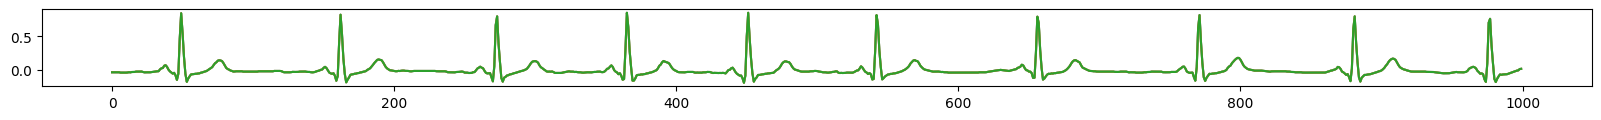

tf.Tensor([1. 0. 0. 0. 0.], shape=(5,), dtype=float32)


In [8]:
plt.figure(figsize=(20,1))
plt.plot(X_train[0])
plt.show()
print(y_train[0])

In [28]:
#define model
model = Sequential()
model.add(Conv2D(16, (50,1), input_shape=(1000,3,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(5,1)))

model.add(Conv2D(64, (50,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(4,1)))

model.add(Conv2D(64, (25,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(5,1)))

model.add(Flatten())
model.add(Dense(10))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 951, 3, 16)        816       
                                                                 
 activation_38 (Activation)  (None, 951, 3, 16)        0         
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 190, 3, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 141, 3, 64)        51264     
                                                                 
 activation_39 (Activation)  (None, 141, 3, 64)        0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 35, 3, 64)        0         
 g2D)                                                

In [32]:
epoch = 50
validation_step = 100
batch_size = 100
history = model.fit(X_train, y_train, validation_split=0.2, epochs=epoch, validation_steps=validation_step, verbose=1)

Epoch 1/50
410/410 [==============================] - 24s 58ms/step - loss: 0.8417 - accuracy: 0.6862 - val_loss: 1.0006 - val_accuracy: 0.6447
Epoch 2/50
410/410 [==============================] - 25s 62ms/step - loss: 0.8172 - accuracy: 0.6957 - val_loss: 0.9743 - val_accuracy: 0.6383
Epoch 3/50
410/410 [==============================] - 25s 60ms/step - loss: 0.7767 - accuracy: 0.7114 - val_loss: 0.9985 - val_accuracy: 0.6407
Epoch 4/50
410/410 [==============================] - 25s 60ms/step - loss: 0.7319 - accuracy: 0.7307 - val_loss: 1.0818 - val_accuracy: 0.6300
Epoch 5/50
410/410 [==============================] - 25s 60ms/step - loss: 0.6901 - accuracy: 0.7431 - val_loss: 1.1619 - val_accuracy: 0.6148
Epoch 6/50
410/410 [==============================] - 25s 60ms/step - loss: 0.6364 - accuracy: 0.7597 - val_loss: 1.2202 - val_accuracy: 0.6160
Epoch 7/50
410/410 [==============================] - 26s 63ms/step - loss: 0.5980 - accuracy: 0.7798 - val_loss: 1.2846 - val_accuracy:

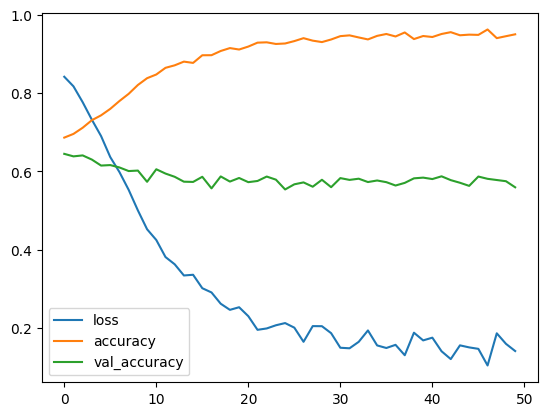

In [34]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

The accuracy of the model is 0.5681318681318681


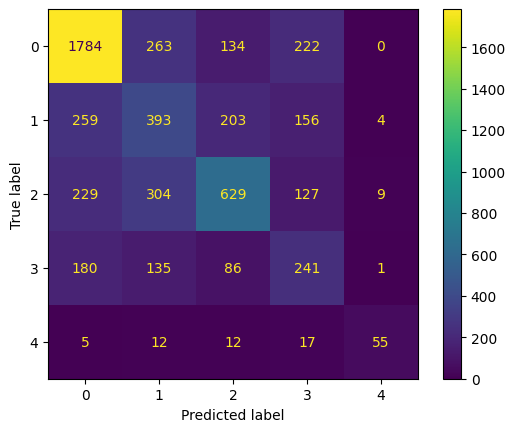

In [35]:
pred = model.predict(X_test)
pred_nohe = np.array([i.argmax() for i in pred])
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test.astype(np.int), pred_nohe))
print(f'The accuracy of the model is {accuracy_score(y_test.astype(np.int), pred_nohe )}')
disp.plot()

In [36]:
converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('C:/Users/sanda/Documents/esp_dev_files/tensor_test_3_cnn/src/cnn_ptb_model_3.tflite', 'wb') as f:
  f.write(tflite_model)

model.save("/Users/sanda/Documents/esp_dev_files/ecg_project_2/ptb_models_test/cnn_ptb_model_3.h5")

INFO:tensorflow:Assets written to: C:\Users\sanda\AppData\Local\Temp\tmpdbfn50iy\assets
